# Plotting Tutorial
## Making use of Python's "matplotlib" and "seaborn" libraries.

The following notebook explores various Python plotting libraries. The first, "matplotlib," is the standard plotting package and allows the user wide latitude with regards to customization. The second, "seaborn," offers less customization but offers unique and powerful means of displaying data.

Ultimately, this tutorial should leave the reader with a better sense of Python's plotting capabilities and font/formatting customization.

We will use gold price and gold volatility data to explore both packages; we will first create a simple line plot showing gold prices and volatility from 2016 to the present. Next, we will use Seaborn to create a "heat map" plot showing average volatility by month across the same time period.

In [1]:
# Introduce packages and define directory
import os 
import sys

import requests
from pandas import json_normalize 

import pandas as pd

import datetime as dt

import numpy as np

import re

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import cm

import seaborn as sns

gold_dir = os.path.dirname(os.path.dirname(os.path.abspath('plotting_tutorial.ipynb'))) + r"\plotting_data"

First, we will be using the "Gold Fixing Price" (USD) from the London Bullion Market. The following cell cleans the data before moving onto the first plotting section.

Citation: ICE Benchmark Administration Limited (IBA), Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars [GOLDAMGBD228NLBM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM, May 25, 2021.

In [2]:
gold = pd.read_csv(gold_dir + r"\gold_fred_05242021.csv", na_values='.')

gold.columns = ['date', 'price']

gold2 = gold.copy()

gold2['date'] = pd.to_datetime(gold2['date'], infer_datetime_format=True)

gold2 = gold2[(gold2['price'].isnull()==0) & (gold2['date']>pd.to_datetime('01-01-2016'))]

print(gold2.dtypes)

gold2.head()

date     datetime64[ns]
price           float64
dtype: object


,date,price
787,2016-01-04,1072.70
788,2016-01-05,1078.00
789,2016-01-06,1083.85
790,2016-01-07,1096.00
791,2016-01-08,1097.45


## Matplotlib

After performing basic data cleaning, we will now plot the data. Before starting our plots, we create variables with desired font, font size, and other formatting characteristics. This way, we can be certain that all plots will have the same formatting.

In [3]:
# Set font size and labels to be used for all plots
ftitle_size = 20
flab_size = 18
ftick_size = 14
fannot_size = 12
font_name = 'Cambria'

title_kws = {'fontname':font_name, 'fontsize':ftitle_size}
lab_kws = {'fontname':font_name, 'fontsize':flab_size}
tick_kws = {'fontname':font_name, 'fontsize':ftick_size}
annot_kws = {'fontname':font_name, 'fontsize':fannot_size}
cbar_kws = {'orientation':'vertical'}

The cardinal rule of creating data visualizations is the following:

__*Do not use any more ink on your visualization than is necessary to convey your desired message!*__

Before each decision when plotting, I ask myself, "Do I need this aspect of the visualization to tell the reader [INSERT IDEA]?" That is why I have removed the top and right spines from the graph; the onlooker should still be able to understand the visualization without them.

Dates for lockdowns beginning found at: https://www.timeanddate.com/holidays/us/lockdown-day-1

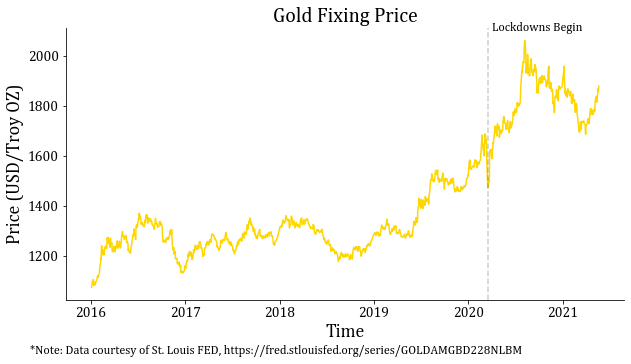

In [4]:
# Define plot size and area
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(gold2['date'], gold2['price'], color='gold')

# Create vertical line denoting date of important event and annotate that event
plt.axvline(pd.to_datetime('03-19-2020'), color='black', linestyle='--', alpha=0.2, label='Lockdown')
ax.annotate('Lockdowns Begin', xy=(pd.to_datetime('04-01-2020'), 2100), **annot_kws)

# Remove top and right spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Formatting for axis ticks, axis labels, and graph title
plt.xticks(**tick_kws)
plt.yticks(**tick_kws)

ax.set_xlabel("Time", **lab_kws)
ax.set_ylabel("Price (USD/Troy OZ)", **lab_kws)

ax.set_title('Gold Fixing Price', **title_kws)

# Citation and citation positioning
citation = '*Note: Data courtesy of St. Louis FED, https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM'
plt.figtext(.075, -.025, citation, **annot_kws)

plt.show()

### Volatility data

For the remainder of the tutorial, we will explore the "CBOE Gold ETF Volatility Index", again courtesy of the St. Louis Fed.

Citation: Chicago Board Options Exchange, CBOE Gold ETF Volatility Index [GVZCLS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GVZCLS, May 25, 2021.

In the following cell, we make use of FRED's API feature to access the gold volatility index; this allows us to access FRED's most up-to-date data from the CBOE without having to go into their website and download it manually. Note that, if one wishes to use the API, then one would have to request a personal API key (available at https://research.stlouisfed.org/useraccount/apikeys after creating a user account).

In [5]:
# url = 'https://api.stlouisfed.org/fred/series/observations'

# # Series that we would like to study (found on series' web page)
# series_id = 'GVZCLS'

# # Individual, personal API key from FRED website
# api_key = 'INSERT API KEY'

# # Keys to pass API in order to specify parameters of our request
# params = {
#     'series_id':series_id,
#     'realtime_start':'2016-01-01',
#     'realtime_end':'2021-05-25',
#     'api_key':api_key,
#     'file_type':'json',
#     'limit':10000
# }

# # Initiate request from API and convert to dataframe
# request = requests.get(url, params=params)
# gold_api = json_normalize(request.json()['observations'])

# # Ensure that dataframe from API has same columns as the one from our CSV file
# gold_api = gold_api[['date', 'value']]

# gold_api.tail()

In [6]:
# gold_cboe = gold_api.copy()
gold_cboe = pd.read_csv(gold_dir + r"\goldvol_fred_05242021.csv", na_values='.')

gold_cboe.columns = ['date', 'gold_vol']

gold_cboe['date'] = pd.to_datetime(gold_cboe['date'])

gold_cboe['gold_vol'] = pd.to_numeric(gold_cboe['gold_vol'], errors='coerce')

gold_cboe = gold_cboe[(gold_cboe['date'] > pd.to_datetime('01-01-2016')) & (gold_cboe['gold_vol'].isnull()==0)]

gold_cboe['month'] = gold_cboe['date'].dt.month
gold_cboe['year'] = gold_cboe['date'].dt.year

gold_cboe.head()

,date,gold_vol,month,year
916,2016-01-04,16.07,1,2016
917,2016-01-05,15.20,1,2016
918,2016-01-06,16.30,1,2016
919,2016-01-07,17.42,1,2016
920,2016-01-08,17.62,1,2016


Below, we create the same plot as above, the only difference being that we use the volatility data.

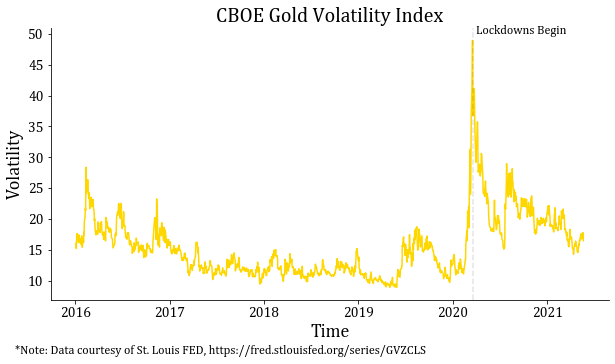

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(gold_cboe['date'], gold_cboe['gold_vol'], color='gold')

plt.axvline(pd.to_datetime('03-19-2020'), color='black', linestyle='--', alpha=0.1, label='Lockdown')
ax.annotate('Lockdowns Begin', xy=(pd.to_datetime('04-01-2020'), 50), **annot_kws)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(**tick_kws)
plt.yticks(**tick_kws)

ax.set_xlabel("Time", **lab_kws)
ax.set_ylabel("Volatility", **lab_kws)
ax.set_title("CBOE Gold Volatility Index", **title_kws)

citation = '*Note: Data courtesy of St. Louis FED, https://fred.stlouisfed.org/series/GVZCLS'
plt.figtext(.075, -.025, citation, **annot_kws)

plt.show()

## Seaborn

Now, we will use Seaborn to create a more visually stimulating data visualization.

In [8]:
gold_avgvol = gold_cboe.groupby(['month', 'year'])['gold_vol'].mean().reset_index()

gold_avgvol['gold_vol'] = gold_avgvol['gold_vol'].round(2)

# Reshape data so that it is in wide form and compatible with Seaborn's heat map plot
gold_volwide = gold_avgvol.pivot('month', 'year', 'gold_vol')

gold_volwide.head()

year,2016,2017,2018,2019,2020,2021
month,,,,,,
1,16.52,14.90,12.02,11.32,12.31,19.80
2,22.16,14.39,13.59,10.06,13.85,19.30
3,20.25,12.44,11.48,10.19,32.85,18.23
4,18.00,13.78,12.42,9.55,29.01,15.54
5,17.69,11.91,11.33,9.39,22.06,16.82


The heat map below reflects monthly averages for the volatility index. The "heatmap" command is a little dense; documentation for all parameters can be found here: https://seaborn.pydata.org/generated/seaborn.heatmap.html

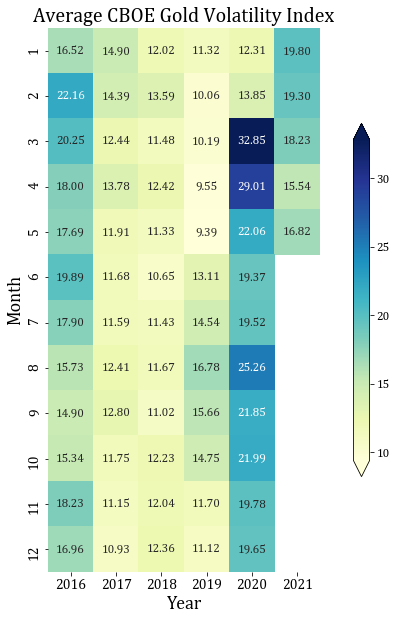

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

# Create heat map plot
sns.heatmap(gold_volwide, annot=True, fmt=".2f", ax=ax, cbar=False, cbar_kws=cbar_kws, cmap="YlGnBu", annot_kws=annot_kws)

# Customize color bar
plt.imshow(gold_volwide, cmap="YlGnBu")
cb = plt.colorbar(extend='both', shrink=0.65)
for l in cb.ax.yaxis.get_ticklabels():
    l.set_family(font_name)
    l.set_size(fannot_size)

plt.xticks(**tick_kws)
plt.yticks(**tick_kws)

ax.set_xlabel("Year", **lab_kws)
ax.set_ylabel("Month", **lab_kws)
ax.set_title("Average CBOE Gold Volatility Index", **title_kws)

plt.show()

Further documentation and sample matplotlib plots can be found at the following website: https://matplotlib.org/stable/tutorials/introductory/sample_plots.html

Similarly, for seaborn: https://seaborn.pydata.org/examples/index.html